# Lena Hamilton
# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/code/lena13/fork-of-notebook70f92d4f56/edit)


## 1.  Writeup
I will be using a dataset found on Kaggle through the NLP and most downloaded filters.  At four years since its last update, this is a somewhat old dataset. I am optimistic that the high number of learning based notebooks that use this dataset is an indicator that it will be a good choice for this project.

* https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction/data

The data is a collection of job postings with a binary flag to denote whether it is a real or fake job post. The dataset does not indicate where the data came from, but it does show that the authors of it are from the University of the Aegean, and that is public domain under the CC0 licence.

This is a good NLP problem because it is trying to determine if there are any clues in the written descriptions that would indicate the falsity of the job posting.



## 2. Exploratory Data Analysis


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
# ...
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [2]:
data1 = pd.read_csv("../input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")
data1.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
data1["fraudulent"].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

This very first look at the data show that it is highly imbalenced twards the 'real' category.

In [5]:
data1.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

This is a measure list of null values in the dataset

In [6]:
text_data1 = data1[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_data1 = text_data1.fillna(' ')

text_data1.head()

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0


The data that have text in it

In [7]:
cat_data1 = data1[["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education", "industry", "function","fraudulent"]]
cat_data1 = cat_data1.fillna("None")

cat_data1.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,None,None,Marketing,0
1,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0
2,0,1,0,None,None,None,None,None,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


columns with either binary or category data

/tmp/ipykernel_20/3335736993.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/tmp/ipykernel_20/3335736993.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/tmp/ipykernel_20/3335736993.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/tmp/ipykernel_20/3335736993.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/tmp/ipykernel_20/3335736993.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/tmp/ipykernel_20/3335736993.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)


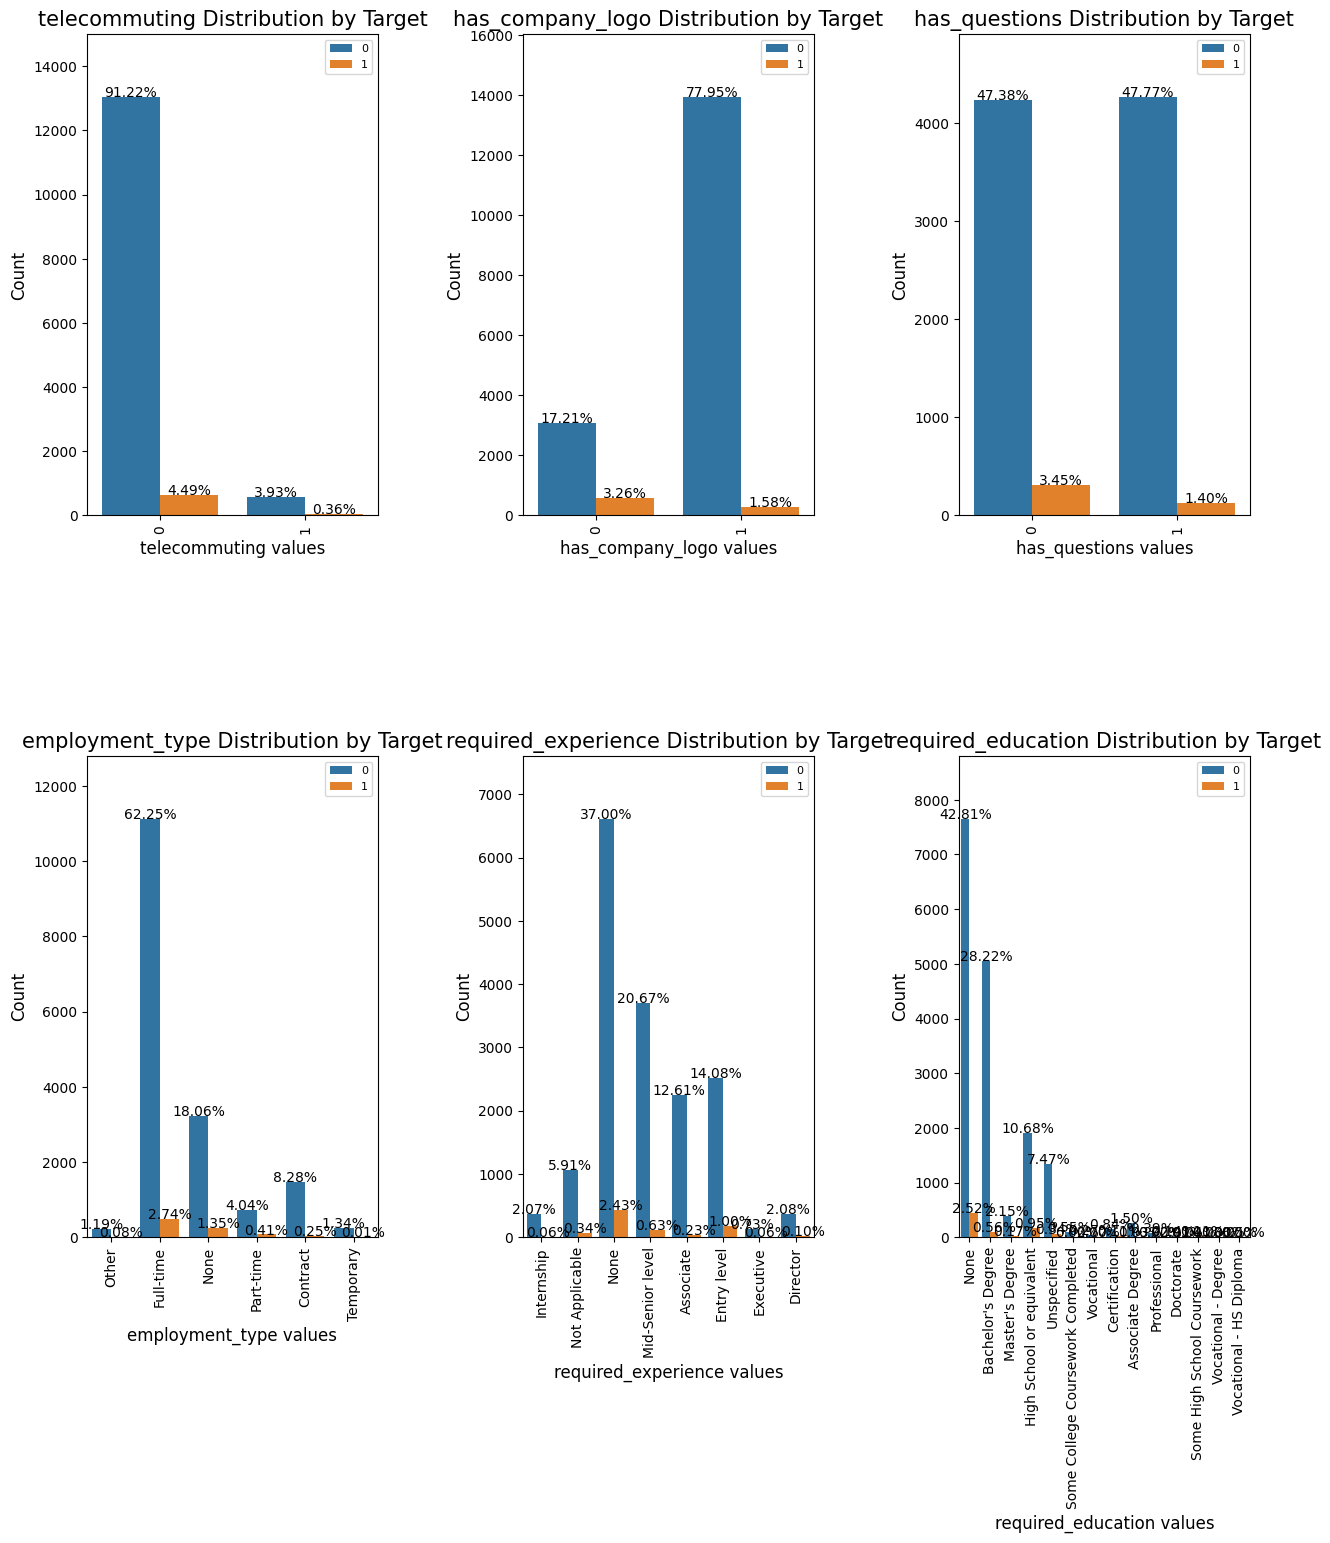

In [8]:
cat_columns = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure


for n, col in enumerate(cat_data1[cat_columns]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=cat_data1, hue='fraudulent') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(cat_data1)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


plt.show()

Blue is the real postings, and orange is the fake

# 3. Baseline Model

In [9]:
X=data1.drop(['fraudulent'],axis=1)
Y=data1['fraudulent']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

split the data into feature & target, and training & test sets

In [10]:
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train).toarray()


print(f"X_train.shape = {X_train.shape}")
type(X_train)

X_train.shape = (17, 17)


numpy.ndarray

In [11]:
#rfc=RandomForestClassifier()

#rfc.fit(X_train,y_train)
#y_pred=rfc.predict(X_test)
#model = RandomForestClassifier(n_estimators=25)
#model = model.fit(X_train, y_train)

#predictions_train = model.predict(X_train)


#print(f"accuracy (on y_train): {accuracy_score(y_train, predictions_train):.4f}")

I Will be using the random forest for the base model for this project